In [1]:
import pandas as pd
import os
from datetime import datetime
from matplotlib import pyplot as plt

## Get Weekly Sale

In [2]:
df = pd.read_csv("ml_analytics_202504181528.csv")

In [3]:
df["ts"] = [datetime.strptime(i, '%Y-%m-%d') for i in df["order_date"]]

In [4]:
df

,order_date,product_name,product_categories,quantity,unit_price,total_price,day_of_week,week,month,year,ts
0,2024-12-31,Microwave Oven,Kitchen Appliances,2,99,198,2,1,12,2024,2024-12-31
1,2024-12-31,Electric Kettle,Kitchen Appliances,5,39,195,2,1,12,2024,2024-12-31
2,2024-12-31,Refrigerator,Big Kitchen Appliances,1,999,999,2,1,12,2024,2024-12-31
3,2024-12-31,HP,Laptops,4,799,3196,2,1,12,2024,2024-12-31
4,2024-12-31,Samsung,Laptops,4,749,2996,2,1,12,2024,2024-12-31
...,...,...,...,...,...,...,...,...,...,...,...
9995,2022-01-01,MacBook,Laptops,5,1299,6495,6,52,1,2022,2022-01-01
9996,2022-01-01,Dell,Laptops,1,899,899,6,52,1,2022,2022-01-01
9997,2022-01-01,Range Hood,Big Kitchen Appliances,3,450,1350,6,52,1,2022,2022-01-01
9998,2022-01-01,Refrigerator,Big Kitchen Appliances,5,999,4995,6,52,1,2022,2022-01-01


In [5]:
df["product_name"].unique()

array(['Microwave Oven', 'Electric Kettle', 'Refrigerator', 'HP',
       'Samsung', 'Coffee Maker', 'iPhone', 'Mixer', 'Dish Washer',
       'MacBook', 'Acer', 'Range Hood', 'Dell', 'Toaster', 'Stove',
       'Xiaomi'], dtype=object)

In [6]:
df[df["product_name"] == df["product_name"].unique()[0]].sort_values("order_date", ascending=False)

,order_date,product_name,product_categories,quantity,unit_price,total_price,day_of_week,week,month,year,ts
0,2024-12-31,Microwave Oven,Kitchen Appliances,2,99,198,2,1,12,2024,2024-12-31
5,2024-12-31,Microwave Oven,Kitchen Appliances,4,99,396,2,1,12,2024,2024-12-31
25,2024-12-28,Microwave Oven,Kitchen Appliances,3,99,297,6,52,12,2024,2024-12-28
42,2024-12-25,Microwave Oven,Kitchen Appliances,4,99,396,3,52,12,2024,2024-12-25
71,2024-12-22,Microwave Oven,Kitchen Appliances,2,99,198,0,51,12,2024,2024-12-22
...,...,...,...,...,...,...,...,...,...,...,...
9902,2022-01-10,Microwave Oven,Kitchen Appliances,2,99,198,1,2,1,2022,2022-01-10
9929,2022-01-08,Microwave Oven,Kitchen Appliances,4,99,396,6,1,1,2022,2022-01-08
9943,2022-01-07,Microwave Oven,Kitchen Appliances,3,99,297,5,1,1,2022,2022-01-07
9944,2022-01-07,Microwave Oven,Kitchen Appliances,5,99,495,5,1,1,2022,2022-01-07


In [7]:
# os.mkdir("products_df")

In [8]:
for product_ in df["product_name"].unique():
    
    # monthly_df = df[df["product_name"]==product_].resample('MS', on='ts')['quantity'].sum().reset_index()
    weekly_df = df[df["product_name"]==product_].resample('W-Mon', on='ts')['quantity'].sum().reset_index()
    weekly_df.columns = ["date", "demand"]
    # weekly_df["date"] = [ for i in weekly_df["date"]]
    weekly_df.to_csv(f"products_df/{product_}_weekly_sale.csv", index=False)

In [9]:
weekly_df["date"][0]

Timestamp('2022-01-10 00:00:00')

## Weekly Demand Forward Curve

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [11]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


In [12]:
def get_data(product_name):
    
    tmp_df_weekly = pd.read_csv(f"products_df/{product_name}_weekly_sale.csv")
    tmp_df_weekly["date"] = [pd.Timestamp(i) for i in tmp_df_weekly["date"]]
    tmp_df_weekly.set_index("date", inplace=True)

    return tmp_df_weekly

In [13]:
product_name = "Electric Kettle"
tmp_df_weekly = get_data(product_name)
# tmp_df_monthly = pd.read_csv("products_df/Electric Kettle_monthly_sale.csv")

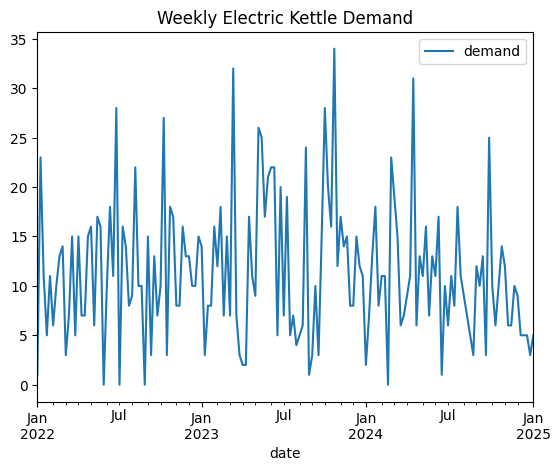

In [14]:
# tmp_df_weekly.columns = ['date', 'demand']
tmp_df_weekly.plot(title=f"Weekly {product_name} Demand")
plt.show()

In [15]:
tmp_df_weekly

,demand
date,
2022-01-03,1
2022-01-10,23
2022-01-17,11
2022-01-24,5
2022-01-31,11
...,...
2024-12-09,5
2024-12-16,5
2024-12-23,5


In [16]:
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    return result[1] > 0.05  # True if non-stationary

is_non_stationary = adf_test(tmp_df_weekly['demand'])
print("Non-stationary?", is_non_stationary)

ADF Statistic: -7.762596459104405
p-value: 9.3682747782522e-12
Non-stationary? False


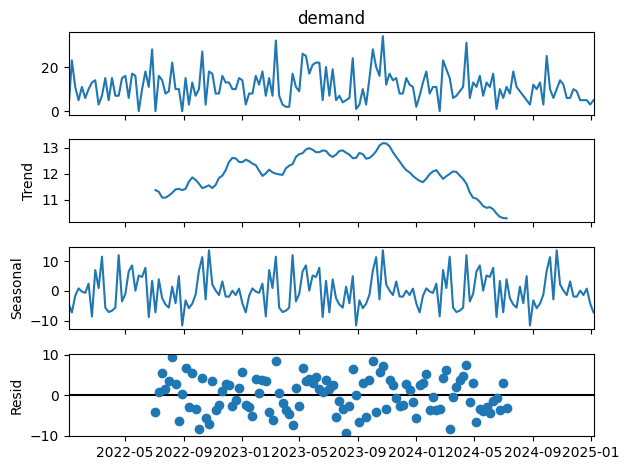

In [17]:
decomposition = seasonal_decompose(tmp_df_weekly['demand'], model='additive')
decomposition.plot()
plt.show()

## Arima

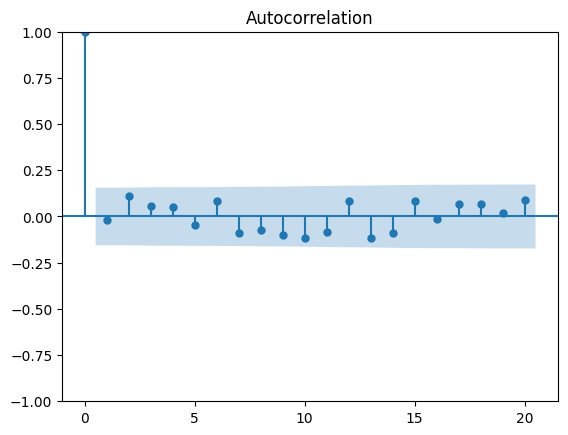

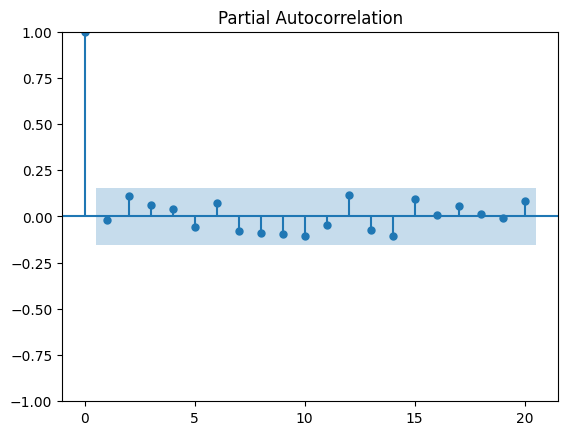

In [18]:
plot_acf(tmp_df_weekly['demand'].dropna(), lags=20)
plot_pacf(tmp_df_weekly['demand'].dropna(), lags=20)
plt.show()

In [19]:
def ARIMA_model(data, p=1, d=2, q=2, test_weeks=12):

    # Split train-test (last 12 weeks for testing)
    train, test = data[:-test_weeks], data[-test_weeks:]

    model_arima = ARIMA(train['demand'], order=(p,d,q)) # Fit ARIMA(1,1,1)
    results_arima = model_arima.fit()

    forecast_arima = results_arima.forecast(steps=test_weeks)
    mae_arima = mean_absolute_error(test['demand'], forecast_arima)
    print("ARIMA MAE:", mae_arima)

    return model_arima, mae_arima





In [20]:
model_arima, mae_arima = ARIMA_model(tmp_df_weekly) 

ARIMA MAE: 2.948813702078308


In [21]:
def SARIMAX_model(data_df, 
                p=1, d=2, q=2, 
                P=1, D=1, Q=1, s=52, 
                test_weeks=12):
    
    # Split train-test (last 12 weeks for testing)
    train, test = data_df[:-test_weeks], data_df[-test_weeks:]

    # Manually set (p,d,q)(P,D,Q,s)
    model_sarima = SARIMAX(
        train['demand'],
        order=(p, d, q),          # Non-seasonal (p,d,q)
        seasonal_order=(P, D, Q, s)  # Seasonal (P,D,Q,s)
    )

    results_sarima = model_sarima.fit()
    forecast_sarima = results_sarima.forecast(steps=test_weeks)

    test_values = test['demand'].values[-test_weeks:]  # Last 12 actual values
    mae_sarima = mean_absolute_error(test_values, forecast_sarima)
    print(f"SARIMAX MAE: {mae_sarima:.2f}")

    return model_sarima, mae_sarima


In [22]:
model_sarima, mae_sarima = SARIMAX_model(tmp_df_weekly) 

SARIMAX MAE: 3.50


In [23]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

def lstm_model(df_weekly, test_weeks=12):
    
    train, test = df_weekly[:-test_weeks], df_weekly[-test_weeks:]
    
    # Scale data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_weekly[['demand']])

    # Create sequences (lookback=12 weeks)
    def create_dataset(data, lookback=12):
        X, y = [], []
        for i in range(len(data)-lookback):
            X.append(data[i:i+lookback])
            y.append(data[i+lookback])
        return np.array(X), np.array(y)

    X, y = create_dataset(scaled_data)
    X_train, X_test = X[:-12], X[-12:]
    y_train, y_test = y[:-12], y[-12:]

    # Reshape for LSTM (samples, timesteps, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

    model_lstm = Sequential()
    model_lstm.add(LSTM(20, activation='relu', return_sequences=True, input_shape=(12, 1)))
    model_lstm.add(LSTM(10, activation='relu'))
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer='adam', loss='mae')

    model_lstm.fit(X_train, y_train, epochs=65, batch_size=128, verbose=0)
    forecast_lstm = model_lstm.predict(X_test)
    forecast_lstm = scaler.inverse_transform(forecast_lstm)

    # Evaluate
    mae_lstm = mean_absolute_error(test['demand'], forecast_lstm)
    print("LSTM MAE:", mae_lstm)
    
    return model_lstm, mae_lstm 
    


In [24]:
model_lstm, mae_lstm = lstm_model(tmp_df_weekly)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
LSTM MAE: 2.9908368587493896


In [25]:
def create_features(df):

    df_new = df.copy()
    df_new['lag1'] = df_new['demand'].shift(1)
    df_new['lag2'] = df_new['demand'].shift(2)
    df_new['rolling_mean'] = df_new['demand'].rolling(4).mean()
    # df = df.set_index("date")
    df_new['month'] = df_new.index.month
    df_new['week'] = df_new.index.isocalendar().week
    return df_new.dropna()


def xgb_model(df, test_weeks=12):

    df_features = create_features(df.copy())
    train, test = df_features[:-test_weeks], df_features[-test_weeks:]
    
    model_xgb = XGBRegressor(n_estimators=200)
    model_xgb.fit(train.drop('demand', axis=1), train['demand'])

    forecast_xgb = model_xgb.predict(test.drop('demand', axis=1))
    mae_xgb = mean_absolute_error(test['demand'], forecast_xgb)
    print("XGBoost MAE:", mae_xgb)

    return model_xgb, mae_xgb



def lgbm_model(df, test_weeks=12):

    df_features = create_features(df.copy())
    train, test = df_features[:-test_weeks], df_features[-test_weeks:]

    model_lgbm = LGBMRegressor(verbose=-1)
    model_lgbm.fit(train.drop('demand', axis=1), train['demand'])

    forecast_lgbm = model_lgbm.predict(test.drop('demand', axis=1))
    mae_lgbm = mean_absolute_error(test['demand'], forecast_lgbm)
    print("LightGBM MAE:", mae_lgbm)
    
    return model_lgbm, mae_lgbm

In [26]:
model_lgbm, mae_lgbm = lgbm_model(tmp_df_weekly)

LightGBM MAE: 4.425272743309292


In [27]:
model_xgb, mae_xgb = xgb_model(tmp_df_weekly)

XGBoost MAE: 3.6467411518096924


In [28]:
df_list = os.listdir("products_df")

In [29]:
df_list[0].split("_")[0]

'Acer'

In [30]:
model_eval = []

for df_ in df_list:
    
    product_name = df_.split("_")[0]
    tmp_df_weekly = get_data(product_name)
    model_arima, mae_arima = ARIMA_model(tmp_df_weekly, p=1, d=1, q=3) 
    model_sarima, mae_sarima = SARIMAX_model(tmp_df_weekly) 
    model_lstm, mae_lstm = lstm_model(tmp_df_weekly)
    model_lgbm, mae_lgbm = lgbm_model(tmp_df_weekly)
    model_xgb, mae_xgb = xgb_model(tmp_df_weekly)
    
    results = {
        "product_name": product_name,
        "mae_arima": mae_arima,
        "mae_sarima": mae_sarima,
        "mae_lstm": mae_lstm,
        "mae_lgbm": mae_lgbm,
        "mae_xgb": mae_xgb
    }
    
    model_eval.append(results)
    # break    
    

ARIMA MAE: 4.448132036498444
SARIMAX MAE: 8.41
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
LSTM MAE: 4.347184658050537
LightGBM MAE: 4.362487309803281
XGBoost MAE: 5.550163745880127
ARIMA MAE: 7.185320659231212
SARIMAX MAE: 7.52
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
LSTM MAE: 7.350881099700928
LightGBM MAE: 5.94454590924263
XGBoost MAE: 6.476034641265869
ARIMA MAE: 4.945820342586401
SARIMAX MAE: 5.16
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
LSTM MAE: 5.125927448272705
LightGBM MAE: 4.403128296986613
XGBoost MAE: 4.899410724639893
ARIMA MAE: 4.063580770059262
SARIMAX MAE: 6.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
LSTM MAE: 4.6061882972717285
LightGBM MAE: 3.6979626784075914
XGBoost MAE: 4.936480522155762
ARIMA MAE: 4.573251620893988
SARIMAX MAE: 3.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
LSTM MAE: 3.5910377502441406
LightGBM MAE: 4.425272743309292
XGBoost MAE: 3.6467411518096924
ARIMA MAE: 7.399957514363945
SARIMAX MAE: 10.64
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
LSTM MAE: 6.8379302024841

In [31]:
tmp_df = pd.DataFrame(model_eval)
tmp_df

,product_name,mae_arima,mae_sarima,mae_lstm,mae_lgbm,mae_xgb
0,Acer,4.448132,8.405453,4.347185,4.362487,5.550164
1,Coffee Maker,7.185321,7.518785,7.350881,5.944546,6.476035
2,Dell,4.945820,5.159296,5.125927,4.403128,4.899411
3,Dish Washer,4.063581,6.977273,4.606188,3.697963,4.936481
4,Electric Kettle,4.573252,3.499433,3.591038,4.425273,3.646741
5,HP,7.399958,10.635980,6.837930,6.244460,7.876741
6,iPhone,6.752952,8.850946,6.727940,6.789131,7.515372
7,MacBook,6.287752,9.581130,6.107817,6.247701,6.966085
8,Microwave Oven,4.574826,6.226827,4.353197,4.086844,3.660262
9,Mixer,5.674143,8.875988,5.804704,5.308445,5.173413


In [226]:
tmp_df_weekly = get_data("Acer")
print("Acer")
ARIMA_model(tmp_df_weekly, p=1, d=1, q=2)
tmp_df_weekly = get_data("Coffee Maker")
print("Coffee Maker")
ARIMA_model(tmp_df_weekly, p=1, d=3, q=2)
tmp_df_weekly = get_data("Dell")
print("Dell")
ARIMA_model(tmp_df_weekly, p=1, d=1, q=2)
tmp_df_weekly = get_data("Dish Washer")
print("Dish Washer")
ARIMA_model(tmp_df_weekly, p=1, d=2, q=2)
tmp_df_weekly = get_data("Electric Kettle")
print("Electric Kettle")
ARIMA_model(tmp_df_weekly, p=1, d=2, q=2)
tmp_df_weekly = get_data("HP")
tmp_df_weekly = get_data("iPhone")
tmp_df_weekly = get_data("MacBook")
tmp_df_weekly = get_data("Microwave Oven")
print("Microwave Oven")
ARIMA_model(tmp_df_weekly, p=1, d=1, q=7)
tmp_df_weekly = get_data("Mixer")
tmp_df_weekly = get_data("Range Hood")
tmp_df_weekly = get_data("Refrigerator")
tmp_df_weekly = get_data("Samsung")
tmp_df_weekly = get_data("Stove")
print("Stove")
ARIMA_model(tmp_df_weekly, p=1, d=3, q=2)
tmp_df_weekly = get_data("Toaster")
print("Toaster")
ARIMA_model(tmp_df_weekly, p=1, d=1, q=2)
tmp_df_weekly = get_data("Xiaomi")
print("Xiaomi")
ARIMA_model(tmp_df_weekly, p=1, d=2, q=3)


# ARIMA_model(tmp_df_weekly, p=1, d=1, q=3)

Acer
ARIMA MAE: 4.2637513610608275
Coffee Maker
ARIMA MAE: 6.631827333392317
Dell
ARIMA MAE: 4.924763619590196
Dish Washer
ARIMA MAE: 3.879511581738116
Electric Kettle
ARIMA MAE: 2.948813702078308
Microwave Oven
ARIMA MAE: 4.189305180005099
Stove
ARIMA MAE: 3.9717749463236633
Toaster
ARIMA MAE: 4.78702922494324
Xiaomi
ARIMA MAE: 6.432781716100535


(<statsmodels.tsa.arima.model.ARIMA at 0x1698a536890>, 6.432781716100535)

In [33]:
print("AVG MAE")
print("****************")
print("arima", sum(tmp_df["mae_arima"])/ len(tmp_df))
print("sarima", sum(tmp_df["mae_sarima"])/ len(tmp_df))
print("lstm", sum(tmp_df["mae_lstm"])/ len(tmp_df))
print("lgbm", sum(tmp_df["mae_lgbm"])/ len(tmp_df))
print("xgb", sum(tmp_df["mae_xgb"])/ len(tmp_df))


AVG MAE
****************
arima 5.720782743008903
sarima 7.411951065979156
lstm 5.773444980382919
lgbm 5.328451893517819
xgb 5.736556276679039


In [34]:
print("AVG MAE")
print("****************")
print("arima", sum(tmp_df["mae_arima"])/ len(tmp_df))
print("sarima", sum(tmp_df["mae_sarima"])/ len(tmp_df))
print("lstm", sum(tmp_df["mae_lstm"])/ len(tmp_df))
print("lgbm", sum(tmp_df["mae_lgbm"])/ len(tmp_df))
print("xgb", sum(tmp_df["mae_xgb"])/ len(tmp_df))


AVG MAE
****************
arima 5.720782743008903
sarima 7.411951065979156
lstm 5.773444980382919
lgbm 5.328451893517819
xgb 5.736556276679039


In [35]:
print("AVG MAE")
print("****************")
print("arima", sum(tmp_df["mae_arima"])/ len(tmp_df))
print("sarima", sum(tmp_df["mae_sarima"])/ len(tmp_df))
print("lstm", sum(tmp_df["mae_lstm"])/ len(tmp_df))
print("lgbm", sum(tmp_df["mae_lgbm"])/ len(tmp_df))
print("xgb", sum(tmp_df["mae_xgb"])/ len(tmp_df))


AVG MAE
****************
arima 5.720782743008903
sarima 7.411951065979156
lstm 5.773444980382919
lgbm 5.328451893517819
xgb 5.736556276679039


In [36]:
tmp_df.to_csv("mae_ml_model.csv", index=False)

In [37]:
product_name = "Toaster"
tmp_df_weekly = get_data(product_name)
model_arima, mae_arima = ARIMA_model(tmp_df_weekly, p=1, d=1, q=3) 
model_sarima, mae_sarima = SARIMAX_model(tmp_df_weekly) 
model_lstm, mae_lstm = lstm_model(tmp_df_weekly)
model_lgbm, mae_lgbm = lgbm_model(tmp_df_weekly)
model_xgb, mae_xgb = xgb_model(tmp_df_weekly)


ARIMA MAE: 4.926667085157407
SARIMAX MAE: 7.05
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
LSTM MAE: 5.319376468658447
LightGBM MAE: 3.9850628494243328
XGBoost MAE: 4.9257893562316895


In [40]:
import mlflow

In [41]:
import mlflow.sklearn
import mlflow.sklearn
import mlflow.sklearn
import mlflow.xgboost


mlflow.set_tracking_uri("http://127.0.0.1:5000/")
mlflow.set_experiment("Commerce ML")


with mlflow.start_run(run_name="LGBMRegressor"):
    mlflow.log_param("model_name", "LGBMRegressor")
    mlflow.log_metrics({
        "mae": round(mae_lgbm, 4)
    })
    mlflow.lightgbm.log_model(model_lgbm, "LGBMRegressor")

print("done: lgbm")


with mlflow.start_run(run_name="XGBoostRegressor"):
    mlflow.log_param("model_name", "XGBoostRegressor")
    mlflow.log_metrics({
        "mae": round(mae_xgb, 4)
    })
    mlflow.xgboost.log_model(model_xgb, "XGBoostRegressor")

print("done: xgboost")

with mlflow.start_run(run_name="LSTM"):
    mlflow.log_param("model_name", "LSTM")
    mlflow.log_metrics({
        "mae": round(mae_lstm, 4)
    })
    mlflow.sklearn.log_model(model_lstm, "LSTM")

print("done: lstm")

with mlflow.start_run(run_name="ARIMA"):
    mlflow.log_param("model_name", "ARIMA")
    mlflow.log_metrics({
        "mae": round(mae_arima, 4)
    })
    mlflow.sklearn.log_model(model_arima, "ARIMA")

print("done: arima")

with mlflow.start_run(run_name="SARIMA"):
    mlflow.log_param("model_name", "SARIMA")
    mlflow.log_metrics({
        "mae": round(mae_sarima, 4)
    })
    mlflow.sklearn.log_model(model_sarima, "SARIMA")

print("done: sarima")

2025/04/19 15:11:00 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBMRegressor at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/18eb58e6a40e43a59066b893e59736f0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: lgbm


2025/04/19 15:11:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBoostRegressor at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/a8b5a63a514246ab9ea5d1a3279d087a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: xgboost


2025/04/19 15:11:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LSTM at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/ab2fbefb151d4c209985e044f2d0bfdf
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: lstm


2025/04/19 15:11:19 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run ARIMA at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/ab8710cf815040079e6a53965e27b03d
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: arima


2025/04/19 15:11:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run SARIMA at: http://127.0.0.1:5000/#/experiments/696442527046136642/runs/3b0e7d13119b49cfab7128403bcba957
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/696442527046136642
done: sarima


# Model Savings

In [286]:
import pickle

In [ ]:
# os.mkdir("../server/server_models")

for df_ in df_list:
    
    product_name = df_.split("_")[0]
    tmp_df_weekly = get_data(product_name)
    model_lgbm, mae_lgbm = lgbm_model(tmp_df_weekly)

    # with open(f'../server/server_models/lgbm_{product_name}.pkl', 'wb') as file:
    #     pickle.dump(model_lgbm, file)
        

LightGBM MAE: 4.362487309803281
LightGBM MAE: 5.94454590924263
LightGBM MAE: 4.403128296986613
LightGBM MAE: 3.6979626784075914
LightGBM MAE: 4.425272743309292
LightGBM MAE: 6.2444598287661615
LightGBM MAE: 6.789131036650399
LightGBM MAE: 6.247700948986054
LightGBM MAE: 4.0868443205424585
LightGBM MAE: 5.308445238615543
LightGBM MAE: 4.1935494544238034
LightGBM MAE: 9.916129563961507
LightGBM MAE: 5.888595517600929
LightGBM MAE: 3.4617601956955366
LightGBM MAE: 3.9850628494243328
LightGBM MAE: 6.3001544038689685


In [242]:
model_lgbm.predict(create_features(tmp_df_weekly).drop("demand", axis=1).tail(1))

array([12.86491843])

In [324]:
create_features(tmp_df_weekly)

,demand,lag1,lag2,rolling_mean,month,week
date,,,,,,
2022-01-31,9,5.0,5.0,7.00,1,5
2022-02-07,11,9.0,5.0,7.50,2,6
2022-02-14,19,11.0,9.0,11.00,2,7
2022-02-21,5,19.0,11.0,11.00,2,8
2022-02-28,18,5.0,19.0,13.25,2,9
...,...,...,...,...,...,...
2024-11-25,13,10.0,6.0,9.50,11,48
2024-12-02,5,13.0,10.0,8.50,12,49
2024-12-09,17,5.0,13.0,11.25,12,50


## For me

In [321]:
for _ in range(7):
    
    next_pred = model_lgbm.predict(create_features(tmp_df_weekly).drop("demand", axis=1).tail(1))
    next_pred = int(next_pred[0])
    next_ts = tmp_df_weekly.index[-1] + pd.offsets.Week(1)
    
    new_entry = pd.DataFrame({'demand': [next_pred]}, index=pd.DatetimeIndex([next_ts]))
    tmp_df_weekly = pd.concat([tmp_df_weekly, new_entry])
    
    
    

In [233]:
create_features(tmp_df_weekly).drop("demand", axis=1).tail(1)

,lag1,lag2,rolling_mean,month,week
date,,,,,
2024-12-23,27.0,17.0,15.75,12,52


In [246]:
tmp_df_weekly.index[-1] + pd.offsets.Week(1)

Timestamp('2024-12-30 00:00:00')

In [249]:
tmp_df_weekly

,demand
date,
2022-01-10,9
2022-01-17,5
2022-01-24,5
2022-01-31,9
2022-02-07,11
...,...
2024-11-25,13
2024-12-02,5
2024-12-09,17


In [254]:
new_entry = pd.DataFrame({'demand': [20]}, index=pd.DatetimeIndex(['2024-12-30']))
tmp_df_weekly = pd.concat([tmp_df_weekly, new_entry])

In [285]:
tmp_df_weekly.tail(10)

,demand
2025-08-11,14
2025-08-18,10
2025-08-25,7
2025-09-01,8
2025-09-08,12
2025-09-15,12
2025-09-22,14
2025-09-29,15
2025-10-06,12
2025-10-13,9


In [311]:
for _ in range(7):
    
    next_pred = loaded_model.predict(create_features(tmp_df_weekly).drop("demand", axis=1).tail(1))
    next_pred = int(next_pred[0])
    next_ts = tmp_df_weekly.index[-1] + pd.offsets.Week(1)
    
    new_entry = pd.DataFrame({'demand': [next_pred]}, index=pd.DatetimeIndex([next_ts]))
    tmp_df_weekly = pd.concat([tmp_df_weekly, new_entry])
    
    
    

In [296]:
with open('../server/server_models/lgbm_Xiaomi.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [ ]:
loaded_model.pre

LGBMRegressor(verbose=-1)

In [320]:
product_

'Xiaomi'

In [ ]:
for 

In [318]:
list(tmp_df_weekly.index[-5:])

[Timestamp('2025-11-03 00:00:00'),
 Timestamp('2025-11-10 00:00:00'),
 Timestamp('2025-11-17 00:00:00'),
 Timestamp('2025-11-24 00:00:00'),
 Timestamp('2025-12-01 00:00:00')]

In [319]:
list(tmp_df_weekly["demand"][-5:])

[16, 11, 8, 9, 11]

In [312]:
tmp_df_weekly

,demand
2022-01-10,9
2022-01-17,5
2022-01-24,5
2022-01-31,9
2022-02-07,11
...,...
2025-11-03,16
2025-11-10,11
2025-11-17,8
2025-11-24,9
